In [1]:
#IMPORTAZIONE DELLE LIBRERIE NECESSARIE

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os


In [2]:
# CARICAMENTO DEL DATASET

# Caricamento del dataset dal percorso specificato
file_path = os.path.expanduser('~/OneDrive/Documenti/DATA SCIENCE/1° ANNO/Data Science Lab/Score_Last_Region.csv')  # percorso del dataset
df = pd.read_csv(file_path)

In [3]:
# VISUALIZZAZIONE DELLE PRIME RIGHE DEL DATASET PER VERIFICA

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.head()) # visualizzazione delle prime 10 righe del dataset per verificarne i contenuti

Dataset loaded: 447 rows, 14 columns
     Country             Region Code  Education      Jobs    Income    Safety  \
0  Australia    New South Wales  AU1   8.507677  8.234613  5.683339  9.809783   
1  Australia           Victoria  AU2   8.507677  8.420949  4.604275  9.755435   
2  Australia         Queensland  AU3   8.192631  8.346320  5.017134  9.782609   
3  Australia    South Australia  AU4   7.579121  8.098626  5.303525  9.918478   
4  Australia  Western Australia  AU5   8.192631  8.853473  5.910166  9.755435   

     Health  Environment  Civic engagement  Accessiblity to services  \
0  9.470329     7.562189         10.009891                  5.375569   
1  9.945661     8.308458         10.009892                  5.524731   
2  9.212691     9.303483         10.009890                  5.278986   
3  9.097826     9.601990         10.009889                  4.872238   
4  9.619574     8.457711         10.009893                  5.158452   

    Housing  Community  Life satisfaction  

In [4]:
# PREPARAZIONE DEI DATI PER CLUSTERING

# Rimuozione delle colonne non numeriche e della variabile target 'Life satisfaction'
X = df.drop(columns=["Country", "Region", "Code", "Life satisfaction"], errors="ignore")
# Verifica che le righe siano tutte numeriche
X = X.apply(pd.to_numeric, errors="coerce") # conversione forzata a numerico (gestione errori come NaN)
# Rimozione righe con valori mancanti (necessario per 
X_clean = X.dropna()

print(f"Valid rows for clustering: {X_clean.shape[0]} / {X.shape[0]}")

Valid rows for clustering: 411 / 447


In [5]:
# STANDARDIZZAZIONE DEI DATI

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [6]:
# APPLICAZIONE DELL'ALGORITMO KMEANS PER CLUSTERING 

# Applico KMeans con 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clustered = df.loc[X_clean.index].copy()
df_clustered["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\micco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [7]:
# CALCOLO DELLE MEDIE PER CLUSTER 

cluster_summary = df_clustered.groupby("Cluster").mean(numeric_only=True)
cluster_counts = df_clustered["Cluster"].value_counts().sort_index()

In [8]:
# VISUALIZZAZIONE DEI RISULTATI

print("Number of regions per cluster:")
print(cluster_counts)

print("Averages of well-being dimensions for each cluster:")
print(cluster_summary.round(3))

Number of regions per cluster:
Cluster
0    120
1     59
2     86
3    146
Name: count, dtype: int64
Averages of well-being dimensions for each cluster:
         Education   Jobs  Income  Safety  Health  Environment  \
Cluster                                                          
0            7.544  6.005   2.433   9.618   5.032        5.219   
1            9.329  8.070   8.635   8.492   4.708        8.782   
2            1.650  3.951   0.395   5.165   4.296        4.188   
3            7.736  7.707   3.980   9.770   7.702        8.182   

         Civic engagement  Accessiblity to services  Housing  Community  \
Cluster                                                                   
0                   3.330                     6.454    2.791      5.695   
1                   4.890                     8.048    8.509      7.689   
2                   5.041                     3.263    1.264      3.209   
3                   7.386                     7.178    6.401      7.902   


In [9]:
# SALVATAGGIO DEI RISULTATI IN .CSV

# Salvataggio delle medie per cluster 
cluster_summary.to_csv("cluster_summary.csv", index=True)
print("File 'cluster_summary.csv' saved successfully.")

# Salvataggio dell'intero dataset clusterizzato
df_clustered.to_csv("regions_clustered.csv", index=False)
print("File 'regions_clustered.csv' saved successfully.")

File 'cluster_summary.csv' saved successfully.
File 'regions_clustered.csv' saved successfully.


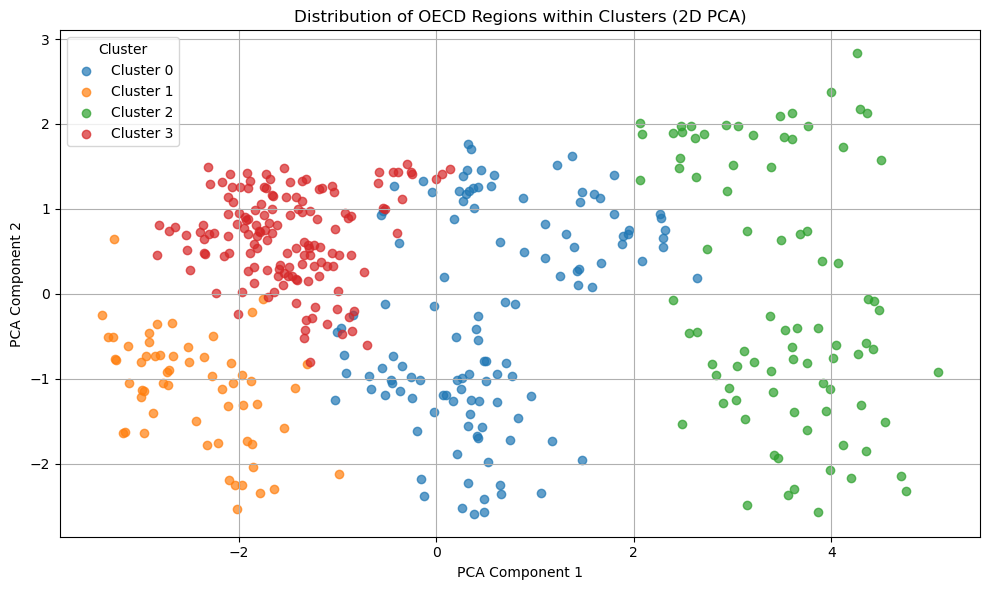

In [10]:
# VISUALIZZAZIONE DEI CLUSTER CON PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA su dati standardizzati
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aggiunta coordinate PCA al dataframe
df_clustered["PCA1"] = X_pca[:, 0]
df_clustered["PCA2"] = X_pca[:, 1]

# Grafico scatter 2D con etichette di cluster
plt.figure(figsize=(10, 6))
for cluster in sorted(df_clustered["Cluster"].unique()):
    subset = df_clustered[df_clustered["Cluster"] == cluster]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {cluster}", alpha=0.7)

plt.title("Distribution of OECD Regions within Clusters (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster") # aggiunta della legenda
plt.grid(True) # aggiunta della griglia per una più facile lettura
plt.tight_layout() # ottimizzazione del layout per evitare sovrapposizione degli elementi
plt.savefig("pca_clusters.jpg", dpi=300)  # salvataggio immagine in formato .jpg
plt.show() # visualizzazione a video del grafico
